In [88]:
# 1. Import thư viện
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [89]:
# 2. Đọc file excel và gắn index với giá Close
#df = pd.read_excel('ADAUSDT.xlsx')
df = pd.read_excel('BNBUSDT.xlsx')
#df = pd.read_excel('ETHUSDT.xlsx')
df1=df.reset_index()['Close']

In [90]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
df=df.loc[::-1].reset_index(drop=True)

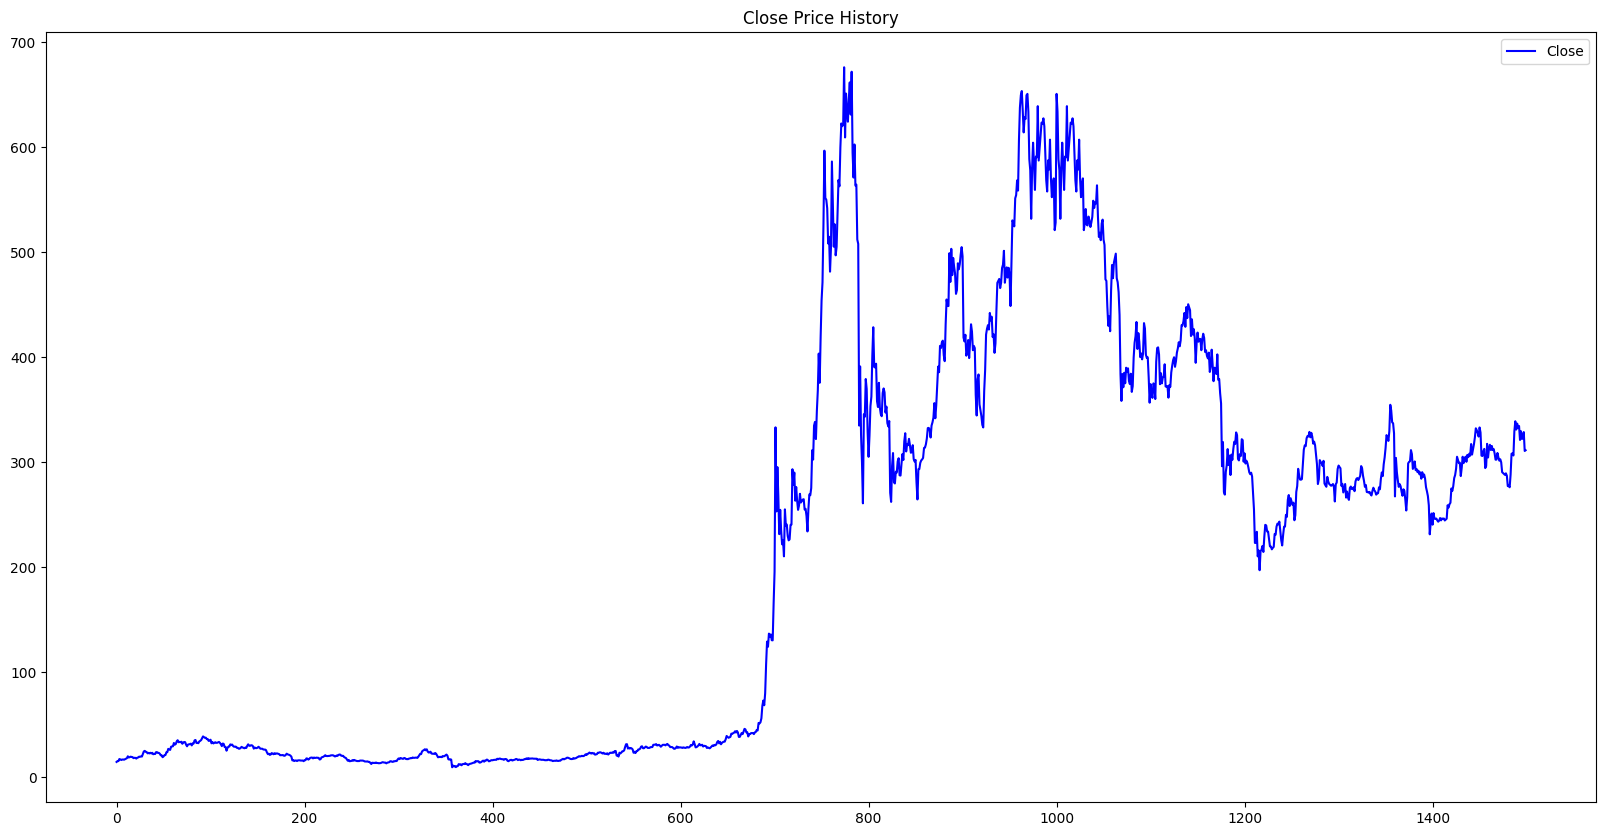

In [91]:
#vẽ biểu đồ giá đóng cửa theo thời gian
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Close'], color='blue', label='Close')
plt.legend(loc='best') #tự động xác định vị trí tốt nhất để đặt chú thích
plt.title('Close Price History')
plt.show()

In [92]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [93]:
# 4. Chia train val test 7 - 1 - 2
train_size = int(0.7 * len(df1))
val_size = int(0.1 * len(df1))
test_size = len(df1) - train_size - val_size

train_data = df1[:train_size]
val_data = df1[train_size:train_size+val_size]
test_data = df1[train_size+val_size:]

In [94]:
# # 4. Chia train val test 6 - 2 - 2
# train_size = int(0.6 * len(df1))
# val_size = int(0.2 * len(df1))
# test_size = len(df1) - train_size - val_size

# train_data = df1[:train_size]
# val_data = df1[train_size:train_size+val_size]
# test_data = df1[train_size+val_size:]

Tiếp theo, ta cần tiến hành huấn luyện mô hình với thuật toán SVR. Ta có thể sử dụng GridSearchCV để tìm kiếm các tham số tối ưu cho mô hình.

In [95]:
# 5. Hàm Create Dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [96]:
#6. Thiết lập tham số cho model
look_back = 30 
X_train, y_train = create_dataset(train_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [97]:
#in thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
#in ra dòng đầu tiên của dữ liệu
print(X_train[1])
print(y_train[0])
#ta thấy dòng cuối cùng của X_train[1]=y_train[0]

(1019, 30) (1019,)
(119, 30) (119,)
(269, 30) (269,)
[0.0088365  0.00882151 0.0117755  0.01125518 0.01041097 0.01101076
 0.01110973 0.01082333 0.01156108 0.01241728 0.01294361 0.01568168
 0.01393327 0.01459754 0.01515835 0.014722   0.01453756 0.01307706
 0.0135569  0.01346993 0.01244278 0.01360938 0.01402624 0.01518984
 0.0150099  0.01557071 0.01534279 0.01894157 0.02258533 0.02344004]
0.023440042105705113


In [98]:
#7. Xây dựng model SVR
#Khởi tạo model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
gamma_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
kernel_range = ['rbf', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(clf, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.163 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.387 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.009 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.010 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.009 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.028 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.011 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [71]:
#In ra tham số tốt nhất
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_) #giá trị này được tính bằng cách lấy âm của MSE

{'C': 46.41588833612773, 'gamma': 0.001, 'kernel': 'linear'}
SVR(C=46.41588833612773, gamma=0.001, kernel='linear')
-0.002018931392012592


In [72]:
#9. Dự báo dữ liệu test, val
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)

In [73]:
# 10. Đánh giá độ chính xác thuật toán bằng MAE và RMSE
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(y_pred_val, y_val)
test_mae = mean_absolute_error(y_pred, y_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation MAE: 0.022083218262294323
Testing MAE: 0.016686327513726687
Validation RMSE: 0.027700492318717775
Testing RMSE: 0.02200003313537903


Sử dụng mô hình đã huấn luyện để dự đoán giá trị Close của 30 ngày tiếp theo bằng cách sử dụng phương thức predict():

Tạo tập dữ liệu giả cho các dự đoán trong tương lai

In [76]:
#Lấy ra 30 ngày cuối cùng của dữ liệu theo thứ tự thời gian của giá trị 'Close'
last_data = np.array(df['Close'].tail(look_back))
print(last_data.shape)

# Reshape last_data để có kích thước (1, lookback)
last_data = last_data.reshape((1, look_back))
future_days = 30

#tạo mảng chứa 30 ngày tiếp theo
future_pred = []

#tạo vòng lặp dự đoán 30 ngày tiếp theo
for i in range(future_days):
    # Dự đoán giá chứng khoán cho ngày tiếp theo sử dụng dữ liệu của last_data
    next_day_prediction = model.predict(last_data)[0]
    # Thêm giá dự đoán được vào mảng furture_pred
    future_pred.append(next_day_prediction)
    # Cập nhật lại last_data bằng cách bỏ giá trị đầu tiên và thêm giá dự đoán của ngày tiếp theo vào cuối mảng last_data
    last_data = np.append(last_data[:, 1:], [[next_day_prediction]], axis=1)
    last_data = last_data.reshape((1, look_back))
    print("{} day output {}".format(i, next_day_prediction))


(30,)
0 day output 288.93370937998975
1 day output 287.6071884738651
2 day output 263.33479930586896
3 day output 259.63295077377666
4 day output 242.85135169792667
5 day output 241.83117377895653
6 day output 211.6839808947445
7 day output 196.17538910384266
8 day output 192.00731745681352
9 day output 185.44330558449676
10 day output 169.8483143626947
11 day output 152.7689545611358
12 day output 143.35276920609905
13 day output 109.96955051067218
14 day output 100.40026047707144
15 day output 70.51662763548504
16 day output 49.87550562659473
17 day output 32.539545759741685
18 day output 26.877939352449374
19 day output 8.760226494879335
20 day output -9.364746742433253
21 day output -21.21663575200435
22 day output -34.60936281741286
23 day output -54.877783673210416
24 day output -76.82149836243005
25 day output -88.57459065898482
26 day output -107.8950333790165
27 day output -121.04241575662334
28 day output -138.4474789931426
29 day output -135.9068298997702


In [102]:
future_pred = np.array(future_pred)

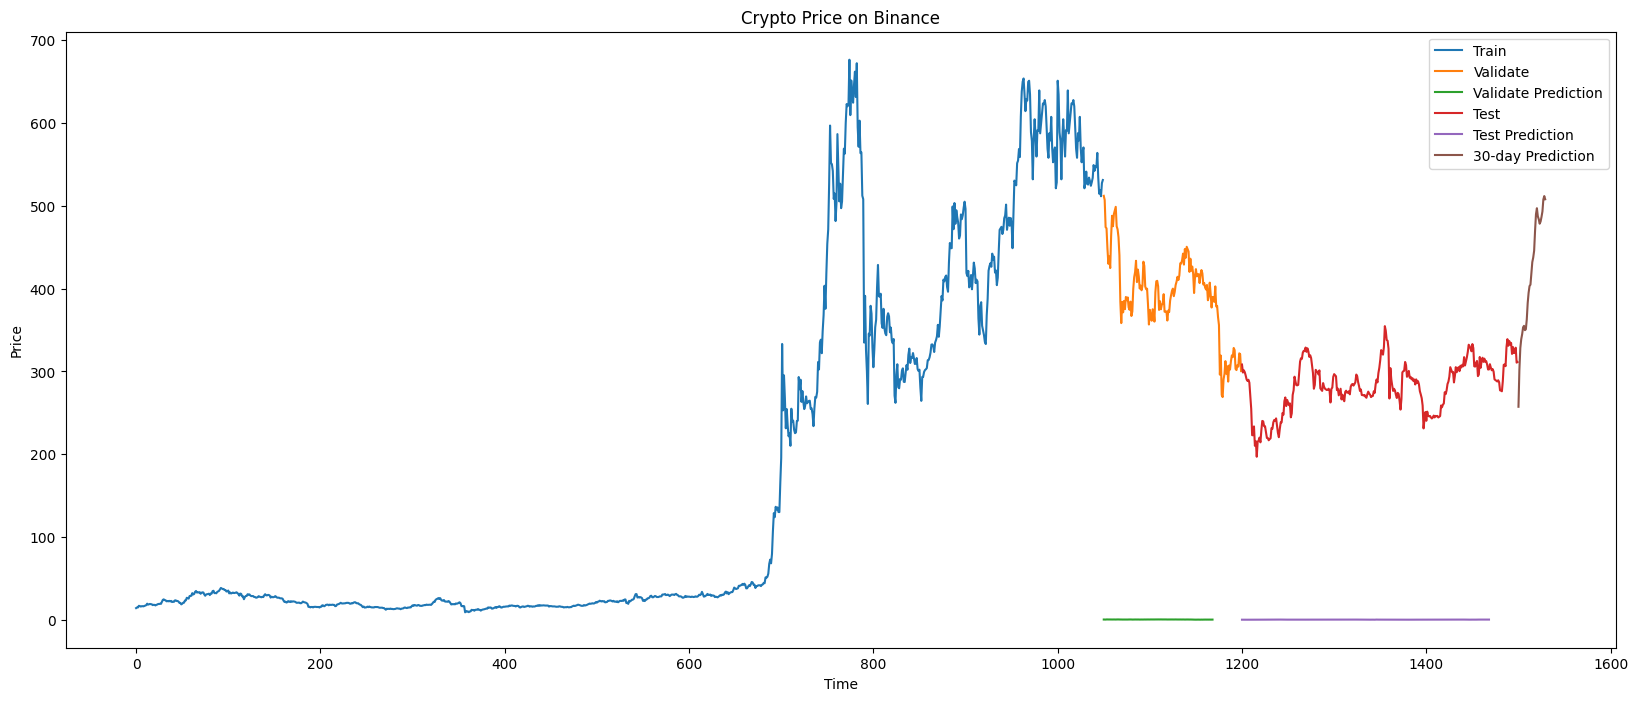

In [103]:
plt.figure(figsize=(20, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

val_data_index = pd.RangeIndex(start=train_size, stop=train_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))

val_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred_val), step=1)
plt.plot(val_pred_index, y_pred_val)

test_data_index = pd.RangeIndex(start=train_size+val_size, stop=train_size+val_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_pred_index = pd.RangeIndex(start=train_size+val_size, stop=train_size+val_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred)

future_pred_index = pd.RangeIndex(start=train_size+val_size+test_size, stop=train_size+val_size+test_size+len(future_pred), step=1)
plt.plot(future_pred_index, scaler.inverse_transform(future_pred))

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Crypto Price on Binance')
plt.legend(['Train', 'Validate', 'Validate Prediction', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()